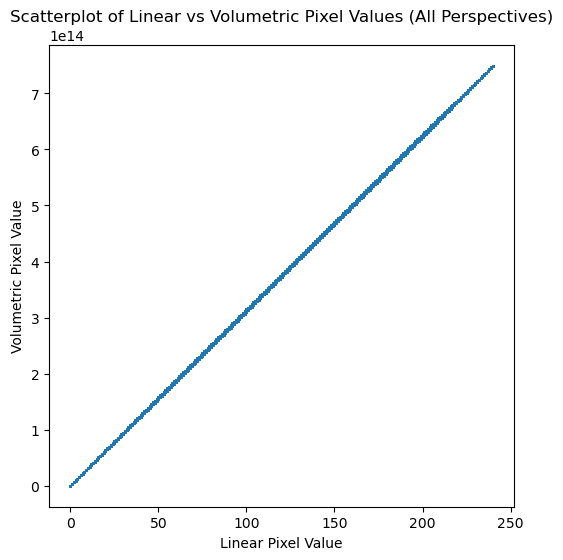

Pearson correlation coefficient (all perspectives): 1.0000
Slope of best fit line: 3123227437820.7124


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load all linear and volumetric tensors from ../perspective_data
linear_files = sorted(glob.glob('../perspective_data_linear/*.npy'))
volumetric_files = sorted(glob.glob('../perspective_data_volumetric_correction/*.npy'))

all_linear = []
all_volumetric = []

for lin_file, vol_file in zip(linear_files, volumetric_files):
    lin = np.load(lin_file)
    vol = np.load(vol_file)
    all_linear.append(lin.flatten())
    all_volumetric.append(vol.flatten())

# Concatenate all perspectives
all_linear_flat = np.concatenate(all_linear)
all_volumetric_flat = np.concatenate(all_volumetric)

plt.figure(figsize=(6, 6))
plt.scatter(all_linear_flat, all_volumetric_flat, s=1, alpha=0.5)
plt.xlabel('Linear Pixel Value')
plt.ylabel('Volumetric Pixel Value')
plt.title('Scatterplot of Linear vs Volumetric Pixel Values (All Perspectives)')
plt.show()

# Calculate the Pearson correlation coefficient to assess linearity
correlation = np.corrcoef(all_linear_flat, all_volumetric_flat)[0, 1]
print(f"Pearson correlation coefficient (all perspectives): {correlation:.4f}")
# Calculate the slope of the best fit line (linear regression)
slope, intercept = np.polyfit(all_linear_flat, all_volumetric_flat, 1)
print(f"Slope of best fit line: {slope:.4f}")